# Colouring matrices

In [1]:
%run colouring.py

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
import sympy
import math
from sympy import *
from sympy.abc import x, n, z, t, k
from sympy.core.cache import *
    
clear_cache()    
    
init_printing(use_latex='mathjax') # for nice printing, a-la' TeX

sys.setrecursionlimit(100000)

plt.rcParams['figure.figsize'] = (10.0, 10.0)

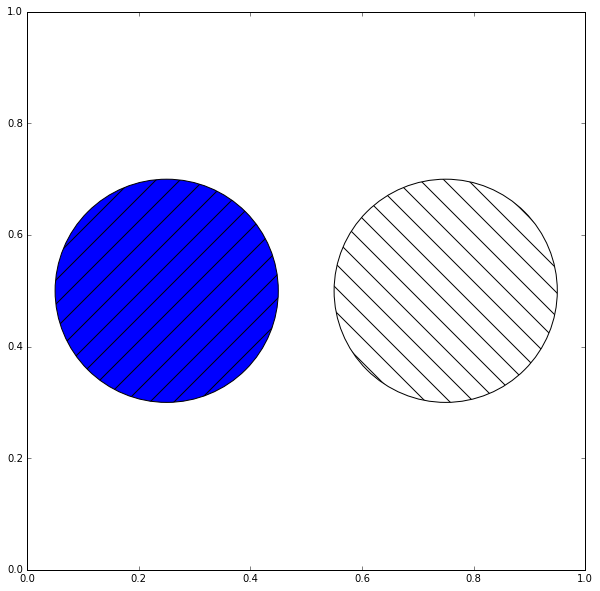

In [19]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, aspect='equal')
for p in [
    patches.Circle(
        (0.25, 0.5), 0.2,
        hatch='/'
    ),
    patches.Circle(
        (0.75, 0.5), 0.2,
        hatch='\\',
        fill=False
    ),
]:
    ax3.add_patch(p)
fig3.savefig('circle3.svg', dpi=90, bbox_inches='tight')

In [20]:
catalan_matrix = Matrix([
            [1,0,0,0,0,0],
            [1,1,0,0,0,0],
            [2,2,1,0,0,0],
            [5,5,3,1,0,0],
            [14,14,9,4,1,0],
            [42,42,28,14,5,1],
        ])
catalan_matrix

⎡1   0   0   0   0  0⎤
⎢                    ⎥
⎢1   1   0   0   0  0⎥
⎢                    ⎥
⎢2   2   1   0   0  0⎥
⎢                    ⎥
⎢5   5   3   1   0  0⎥
⎢                    ⎥
⎢14  14  9   4   1  0⎥
⎢                    ⎥
⎣42  42  28  14  5  1⎦

In [21]:
alpha = 2
bound = 2**alpha
pc = catalan_matrix[:bound, :bound]
pc = pc.applyfunc(lambda c: c % 2)
pc

⎡1  0  0  0⎤
⎢          ⎥
⎢1  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣1  1  1  1⎦

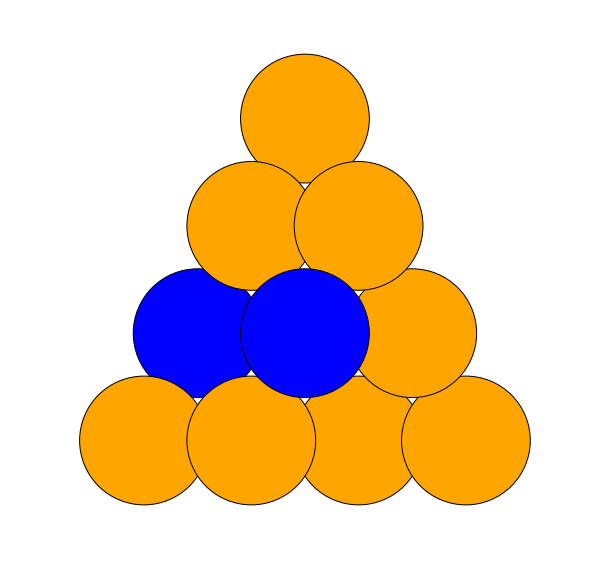

In [22]:
_ = colour_matrix(pc)

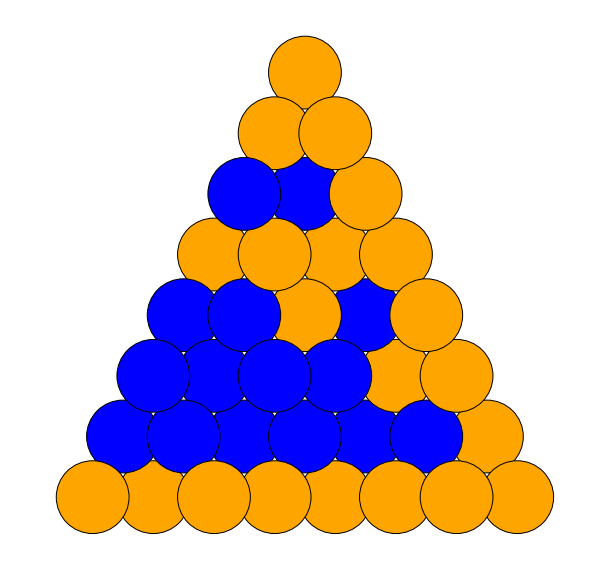

In [23]:
pc = build_modular_catalan(pc)
_ = colour_matrix(pc)

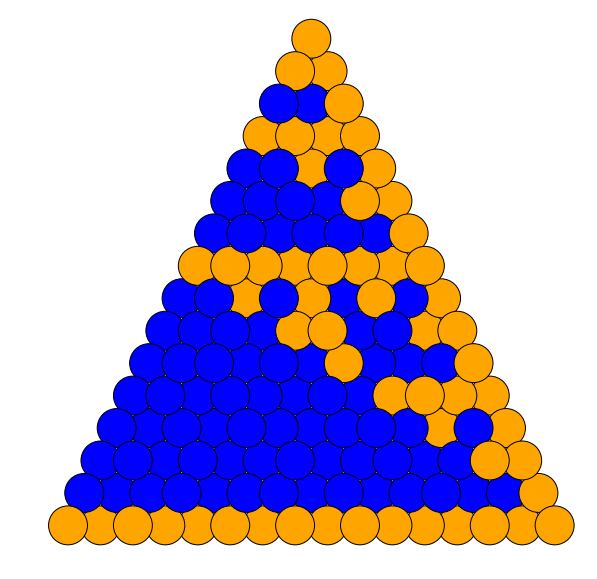

In [24]:
pc = build_modular_catalan(pc)
_ = colour_matrix(pc)

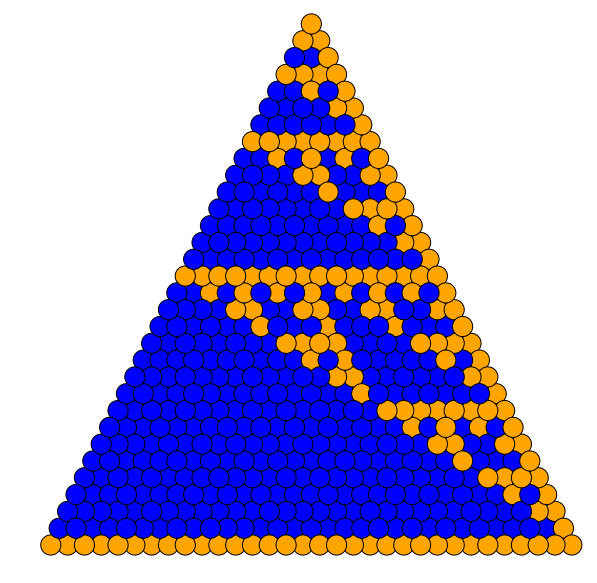

In [25]:
pc = build_modular_catalan(pc)
_ = colour_matrix(pc)

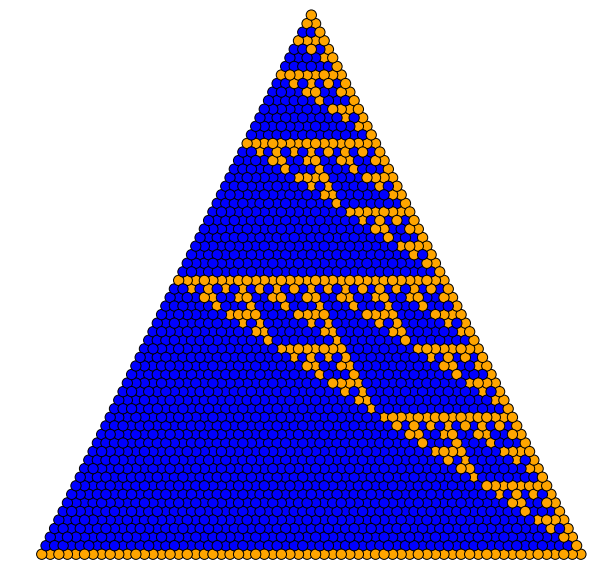

In [26]:
pc = build_modular_catalan(pc)
_ = colour_matrix(pc)

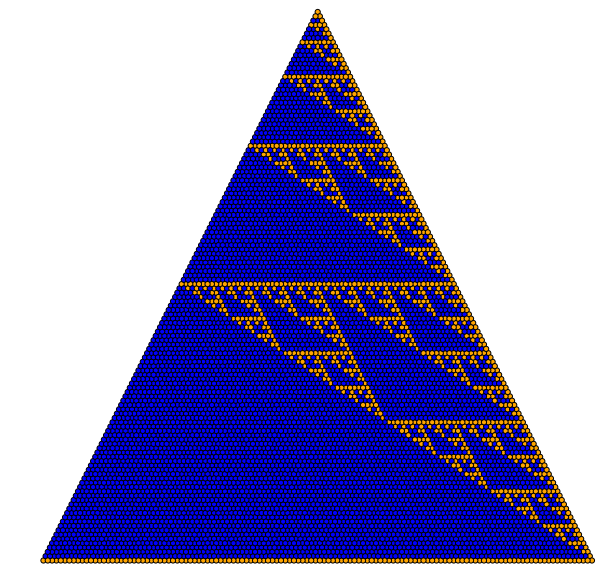

In [101]:
pc = build_modular_catalan(pc)
_ = colour_matrix(pc)

# Unfolding matrix' coefficients according recurrences

In [60]:
def symbolic_matrix(dims, gen_coeff_symbol, rule, inits, lower=True):
    return Matrix(*dims, lambda n,k: 0 if lower and n < k else gen_coeff_symbol[n,k])

def make_lower_triangular(m):
    for r in range(m.rows):
        for c in range(r+1, m.cols):
            m[r,c] = 0
            
def unfold_in_matrix(m, rec, unfold_row_start_index=1, 
                     unfold_col_start_index=0, row_sym=Symbol('n'), col_sym=Symbol('k')):
    
    indexed_sym, row_sym_index, col_sym_index = rec.lhs.args
    
    for r in range(unfold_row_start_index,m.rows):
        for c in range(unfold_col_start_index, r+1):
            row_eq, col_eq = Eq(row_sym_index,r), Eq(col_sym_index,c)
            row_sol, col_sol = (solve(row_eq, row_sym)[0], solve(col_eq, col_sym)[0])
            instantiated_rec = rec.subs({row_sym: row_sol, col_sym:col_sol}, simultaneous=True)
            unfold_term = 0
            for summand in flatten(instantiated_rec.rhs.args, cls=Add):
                coeff_wild = Wild('coeff', exclude=[indexed_sym])
                row_wild = Wild('n', exclude=[indexed_sym])
                col_wild = Wild('k', exclude=[indexed_sym])
                matched = summand.match(coeff_wild * indexed_sym[row_wild, col_wild])
                if not matched: continue
                inst_row_index = matched[row_wild]
                inst_col_index = matched[col_wild]
                coeff = matched[coeff_wild]
                if inst_row_index in range(m.rows) and inst_col_index in range(m.cols):
                    unfold_term += coeff * m[inst_row_index, inst_col_index]
            m[r,c] = unfold_term
            
def build_rec_from_gf(gf_spec, indexed_sym, 
                      row_sym=Symbol('n'), col_sym=Symbol('k')):
    '''I have to build a recurrence starting from `indexed_sym[n+1, k+1]`'''
    gf, gf_var, n = gf_spec
    gf_series = gf.series(gf_var, n=n)
    rhs = 0
    for i in range(n):
        rhs += gf_series.coeff(gf_var, n=i) * indexed_sym[row_sym, col_sym + i]
        
    return Eq(indexed_sym[row_sym+1, col_sym+1], rhs)
    
def apply_subs(m, substitutions):
    term = m.subs(substitutions)
    for k,v in substitutions.items(): term = Subs(term, k, v)
    return term

In [14]:
m_symbol = IndexedBase('m')
pascal_rec = Eq(m_symbol[n+1,k+1], m_symbol[n,k] + m_symbol[n,k+1])
pascal_rec

m[n + 1, k + 1] = m[n, k] + m[n, k + 1]

In [15]:
dims = (15,15)
sm = symbolic_matrix(dims, m_symbol, None, None)
sm

⎡m[0, 0]      0         0         0         0         0         0         0   
⎢                                                                             
⎢m[1, 0]   m[1, 1]      0         0         0         0         0         0   
⎢                                                                             
⎢m[2, 0]   m[2, 1]   m[2, 2]      0         0         0         0         0   
⎢                                                                             
⎢m[3, 0]   m[3, 1]   m[3, 2]   m[3, 3]      0         0         0         0   
⎢                                                                             
⎢m[4, 0]   m[4, 1]   m[4, 2]   m[4, 3]   m[4, 4]      0         0         0   
⎢                                                                             
⎢m[5, 0]   m[5, 1]   m[5, 2]   m[5, 3]   m[5, 4]   m[5, 5]      0         0   
⎢                                                                             
⎢m[6, 0]   m[6, 1]   m[6, 2]   m[6, 3]   m[6, 4]   m

In [6]:
make_lower_triangular(sm)
sm

⎡m[0, 0]      0         0         0         0         0         0         0   
⎢                                                                             
⎢m[1, 0]   m[1, 1]      0         0         0         0         0         0   
⎢                                                                             
⎢m[2, 0]   m[2, 1]   m[2, 2]      0         0         0         0         0   
⎢                                                                             
⎢m[3, 0]   m[3, 1]   m[3, 2]   m[3, 3]      0         0         0         0   
⎢                                                                             
⎢m[4, 0]   m[4, 1]   m[4, 2]   m[4, 3]   m[4, 4]      0         0         0   
⎢                                                                             
⎢m[5, 0]   m[5, 1]   m[5, 2]   m[5, 3]   m[5, 4]   m[5, 5]      0         0   
⎢                                                                             
⎢m[6, 0]   m[6, 1]   m[6, 2]   m[6, 3]   m[6, 4]   m

In [11]:
(4*m_symbol[n+1,k-3]).args, sm[5,1].args

((4, m[n + 1, k - 3]), (m, 5, 1))

In [18]:
unfold_in_matrix(sm, pascal_rec, unfold_row_start_index=1)
sm

⎡m[0, 0]      0           0            0            0             0           
⎢                                                                             
⎢m[0, 0]   m[0, 0]        0            0            0             0           
⎢                                                                             
⎢m[0, 0]  2⋅m[0, 0]    m[0, 0]         0            0             0           
⎢                                                                             
⎢m[0, 0]  3⋅m[0, 0]   3⋅m[0, 0]     m[0, 0]         0             0           
⎢                                                                             
⎢m[0, 0]  4⋅m[0, 0]   6⋅m[0, 0]    4⋅m[0, 0]     m[0, 0]          0           
⎢                                                                             
⎢m[0, 0]  5⋅m[0, 0]   10⋅m[0, 0]  10⋅m[0, 0]    5⋅m[0, 0]      m[0, 0]        
⎢                                                                             
⎢m[0, 0]  6⋅m[0, 0]   15⋅m[0, 0]  20⋅m[0, 0]    15⋅m

In [20]:
(sm.LUdecomposition()[0]).subs({m_symbol[1,1]:1})

⎡1  0   0    0    0     0     0     0     0     0     0     0   0   0   0⎤
⎢                                                                        ⎥
⎢1  1   0    0    0     0     0     0     0     0     0     0   0   0   0⎥
⎢                                                                        ⎥
⎢1  2   1    0    0     0     0     0     0     0     0     0   0   0   0⎥
⎢                                                                        ⎥
⎢1  3   3    1    0     0     0     0     0     0     0     0   0   0   0⎥
⎢                                                                        ⎥
⎢1  4   6    4    1     0     0     0     0     0     0     0   0   0   0⎥
⎢                                                                        ⎥
⎢1  5   10  10    5     1     0     0     0     0     0     0   0   0   0⎥
⎢                                                                        ⎥
⎢1  6   15  20    15    6     1     0     0     0     0     0   0   0   0⎥
⎢                        

In [21]:
sm.rref()

⎛⎡1  0  0  0  0  0  0  0  0  0  0  0  0  0  0⎤, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
⎜⎢                                           ⎥                                
⎜⎢0  1  0  0  0  0  0  0  0  0  0  0  0  0  0⎥                                
⎜⎢                                           ⎥                                
⎜⎢0  0  1  0  0  0  0  0  0  0  0  0  0  0  0⎥                                
⎜⎢                                           ⎥                                
⎜⎢0  0  0  1  0  0  0  0  0  0  0  0  0  0  0⎥                                
⎜⎢                                           ⎥                                
⎜⎢0  0  0  0  1  0  0  0  0  0  0  0  0  0  0⎥                                
⎜⎢                                           ⎥                                
⎜⎢0  0  0  0  0  1  0  0  0  0  0  0  0  0  0⎥                                
⎜⎢                                           ⎥                                
⎜⎢0  0  0  0  0  0  1  0  0  0  0  0  0  0  0⎥      

In [34]:
def nats(t): return 2 + t/(1-t)**2

ns = nats(t).series(n=20)
ns

           2      3      4      5      6      7      8      9       10       1
2 + t + 2⋅t  + 3⋅t  + 4⋅t  + 5⋅t  + 6⋅t  + 7⋅t  + 8⋅t  + 9⋅t  + 10⋅t   + 11⋅t 

1       12       13       14       15       16       17       18       19    ⎛
  + 12⋅t   + 13⋅t   + 14⋅t   + 15⋅t   + 16⋅t   + 17⋅t   + 18⋅t   + 19⋅t   + O⎝

 20⎞
t  ⎠

In [35]:
build_rec_from_gf((ns, t, 20), m_symbol)

m[n + 1, k + 1] = 2⋅m[n, k] + m[n, k + 1] + 2⋅m[n, k + 2] + 3⋅m[n, k + 3] + 4⋅
m[n, k + 4] + 5⋅m[n, k + 5] + 6⋅m[n, k + 6] + 7⋅m[n, k + 7] + 8⋅m[n, k + 8] + 
9⋅m[n, k + 9] + 10⋅m[n, k + 10] + 11⋅m[n, k + 11] + 12⋅m[n, k + 12] + 13⋅m[n, 
k + 13] + 14⋅m[n, k + 14] + 15⋅m[n, k + 15] + 16⋅m[n, k + 16] + 17⋅m[n, k + 17
] + 18⋅m[n, k + 18] + 19⋅m[n, k + 19]

### Shapiro triangle

In [22]:
c_symbol = IndexedBase('c')
shapiro_catalan_rec = Eq(c_symbol[n+1,k+1], c_symbol[n,k] + 2*c_symbol[n,k+1]+c_symbol[n,k+2])
shapiro_catalan_rec

c[n + 1, k + 1] = c[n, k] + 2⋅c[n, k + 1] + c[n, k + 2]

In [57]:
dims = (10,10)
shapiro = symbolic_matrix(dims, c_symbol, None, None)
unfold_in_matrix(shapiro, shapiro_catalan_rec, unfold_row_start_index=2)
shapiro

⎡          c[0, 0]                         0                             0    
⎢                                                                             
⎢          c[1, 0]                      c[1, 1]                          0    
⎢                                                                             
⎢    2⋅c[1, 0] + c[1, 1]          c[1, 0] + 2⋅c[1, 1]                 c[1, 1] 
⎢                                                                             
⎢   5⋅c[1, 0] + 4⋅c[1, 1]        4⋅c[1, 0] + 6⋅c[1, 1]          c[1, 0] + 4⋅c[
⎢                                                                             
⎢  14⋅c[1, 0] + 14⋅c[1, 1]      14⋅c[1, 0] + 20⋅c[1, 1]        6⋅c[1, 0] + 15⋅
⎢                                                                             
⎢  42⋅c[1, 0] + 48⋅c[1, 1]      48⋅c[1, 0] + 69⋅c[1, 1]       27⋅c[1, 0] + 56⋅
⎢                                                                             
⎢ 132⋅c[1, 0] + 165⋅c[1, 1]    165⋅c[1, 0] + 242⋅c[1

In [59]:
clear_cache()
apply_subs(shapiro, {c_symbol[1,0]:2*c_symbol[0,0]})

TypeError: unorderable types: NoneType() > NoneType()

### Catalan triangle

In [36]:
c_symbol = IndexedBase('c')
n=10
dims = (n,n)
catalan_rec = build_rec_from_gf((1/(1-t), t, n), c_symbol)
catalan_rec

c[n + 1, k + 1] = c[n, k] + c[n, k + 1] + c[n, k + 2] + c[n, k + 3] + c[n, k +
 4] + c[n, k + 5] + c[n, k + 6] + c[n, k + 7] + c[n, k + 8] + c[n, k + 9]

In [39]:
catalan = symbolic_matrix(dims, c_symbol, None, None)
unfold_in_matrix(catalan, catalan_rec, unfold_row_start_index=1)
catalan

⎡  c[0, 0]          0             0             0             0             0 
⎢                                                                             
⎢  c[0, 0]       c[0, 0]          0             0             0             0 
⎢                                                                             
⎢ 2⋅c[0, 0]     2⋅c[0, 0]      c[0, 0]          0             0             0 
⎢                                                                             
⎢ 5⋅c[0, 0]     5⋅c[0, 0]     3⋅c[0, 0]      c[0, 0]          0             0 
⎢                                                                             
⎢ 14⋅c[0, 0]    14⋅c[0, 0]    9⋅c[0, 0]     4⋅c[0, 0]      c[0, 0]          0 
⎢                                                                             
⎢ 42⋅c[0, 0]    42⋅c[0, 0]    28⋅c[0, 0]    14⋅c[0, 0]    5⋅c[0, 0]      c[0, 
⎢                                                                             
⎢132⋅c[0, 0]   132⋅c[0, 0]    90⋅c[0, 0]    48⋅c[0, 

## a matrix approach to a characterization of odd-subscript Fibonacci numbers

In [23]:
d = 10
m = Matrix(d,d, lambda i,j: binomial(n-i,j)*binomial(n-j,i))
m

⎡           ⎛n⎞              ⎛n⎞              ⎛n⎞              ⎛n⎞            
⎢ 1         ⎜ ⎟              ⎜ ⎟              ⎜ ⎟              ⎜ ⎟            
⎢           ⎝1⎠              ⎝2⎠              ⎝3⎠              ⎝4⎠            
⎢                                                                             
⎢               2                                                             
⎢⎛n⎞     ⎛n - 1⎞       ⎛n - 2⎞ ⎛n - 1⎞  ⎛n - 3⎞ ⎛n - 1⎞  ⎛n - 4⎞ ⎛n - 1⎞  ⎛n -
⎢⎜ ⎟     ⎜     ⎟       ⎜     ⎟⋅⎜     ⎟  ⎜     ⎟⋅⎜     ⎟  ⎜     ⎟⋅⎜     ⎟  ⎜   
⎢⎝1⎠     ⎝  1  ⎠       ⎝  1  ⎠ ⎝  2  ⎠  ⎝  1  ⎠ ⎝  3  ⎠  ⎝  1  ⎠ ⎝  4  ⎠  ⎝  1
⎢                                                                             
⎢                                2                                            
⎢⎛n⎞  ⎛n - 2⎞ ⎛n - 1⎞     ⎛n - 2⎞       ⎛n - 3⎞ ⎛n - 2⎞  ⎛n - 4⎞ ⎛n - 2⎞  ⎛n -
⎢⎜ ⎟  ⎜     ⎟⋅⎜     ⎟     ⎜     ⎟       ⎜     ⎟⋅⎜     ⎟  ⎜     ⎟⋅⎜     ⎟  ⎜   
⎢⎝2⎠  ⎝  1  ⎠ ⎝  2  ⎠     ⎝  2  ⎠       ⎝  2  ⎠ ⎝  3

In [21]:
m.subs(n,9)

⎡ 1    9   36   84   126  126  84  36  9  1⎤
⎢                                          ⎥
⎢ 9   64   196  336  350  224  84  16  1  0⎥
⎢                                          ⎥
⎢36   196  441  525  350  126  21  1   0  0⎥
⎢                                          ⎥
⎢84   336  525  400  150  24   1   0   0  0⎥
⎢                                          ⎥
⎢126  350  350  150  25    1   0   0   0  0⎥
⎢                                          ⎥
⎢126  224  126  24    1    0   0   0   0  0⎥
⎢                                          ⎥
⎢84   84   21    1    0    0   0   0   0  0⎥
⎢                                          ⎥
⎢36   16    1    0    0    0   0   0   0  0⎥
⎢                                          ⎥
⎢ 9    1    0    0    0    0   0   0   0  0⎥
⎢                                          ⎥
⎣ 1    0    0    0    0    0   0   0   0  0⎦

In [49]:
f = IndexedBase('f')
fibs = [fibonacci(i) for i in range(50)]
mp = (ones(1,d)*m*ones(d,1))[0,0]
odd_fibs_eq = Eq(f[2*n+1], mp, evaluate=True)
odd_fibs_eq

                                                                              
               ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞    
f[2*n + 1] = 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2
               ⎝1⎠     ⎝2⎠     ⎝3⎠     ⎝4⎠     ⎝5⎠     ⎝6⎠     ⎝7⎠     ⎝8⎠    

                                                                              
 ⎛n⎞     ⎛n - 9⎞ ⎛n - 1⎞     ⎛n - 9⎞ ⎛n - 2⎞     ⎛n - 9⎞ ⎛n - 3⎞     ⎛n - 9⎞ ⎛
⋅⎜ ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜
 ⎝9⎠     ⎝  1  ⎠ ⎝  9  ⎠     ⎝  2  ⎠ ⎝  9  ⎠     ⎝  3  ⎠ ⎝  9  ⎠     ⎝  4  ⎠ ⎝

                                                                              
n - 4⎞     ⎛n - 9⎞ ⎛n - 5⎞     ⎛n - 9⎞ ⎛n - 6⎞     ⎛n - 9⎞ ⎛n - 7⎞     ⎛n - 9⎞
     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟
  9  ⎠     ⎝  5  ⎠ ⎝  9  ⎠     ⎝  6  ⎠ ⎝  9  ⎠     ⎝  7  ⎠ ⎝  9  ⎠     ⎝  8  ⎠

                  2                              

In [50]:
(m*ones(d,1))

⎡                                                   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n
⎢                                                   ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ 
⎢                                                   ⎝1⎠   ⎝2⎠   ⎝3⎠   ⎝4⎠   ⎝5
⎢                                                                             
⎢                                                                             
⎢⎛n⎞   ⎛n - 9⎞ ⎛n - 1⎞   ⎛n - 8⎞ ⎛n - 1⎞   ⎛n - 7⎞ ⎛n - 1⎞   ⎛n - 6⎞ ⎛n - 1⎞  
⎢⎜ ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ +
⎢⎝1⎠   ⎝  1  ⎠ ⎝  9  ⎠   ⎝  1  ⎠ ⎝  8  ⎠   ⎝  1  ⎠ ⎝  7  ⎠   ⎝  1  ⎠ ⎝  6  ⎠  
⎢                                                                             
⎢                                                                             
⎢⎛n⎞   ⎛n - 9⎞ ⎛n - 2⎞   ⎛n - 8⎞ ⎛n - 2⎞   ⎛n - 7⎞ ⎛n - 2⎞   ⎛n - 6⎞ ⎛n - 2⎞  
⎢⎜ ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ +
⎢⎝2⎠   ⎝  2  ⎠ ⎝  9  ⎠   ⎝  2  ⎠ ⎝  8  ⎠   ⎝  2  ⎠ ⎝

In [45]:
mp/2

                                                                              
                                                                              
                                                                              
⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n - 9⎞ ⎛n - 1⎞   ⎛n - 9
⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     
⎝1⎠   ⎝2⎠   ⎝3⎠   ⎝4⎠   ⎝5⎠   ⎝6⎠   ⎝7⎠   ⎝8⎠   ⎝9⎠   ⎝  1  ⎠ ⎝  9  ⎠   ⎝  2  

                                                                              
                                                                              
                                                                              
⎞ ⎛n - 2⎞   ⎛n - 9⎞ ⎛n - 3⎞   ⎛n - 9⎞ ⎛n - 4⎞   ⎛n - 9⎞ ⎛n - 5⎞   ⎛n - 9⎞ ⎛n -
⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜   
⎠ ⎝  9  ⎠   ⎝  3  ⎠ ⎝  9  ⎠   ⎝  4  ⎠ ⎝  9  ⎠   ⎝  5  ⎠ ⎝  9  ⎠   ⎝  6  ⎠ ⎝  9

                                                 2

In [48]:
[(mp).subs(n,i) for i in range(10)]

[376946195, 83845410, 16195545, 2632685, 344585, 34110, 2640, 1070, 2585, 6765
]

In [4]:
def d(t): return 1/(1-t)
def h(t): return (t/(1-t))**2

(d(t)*h(t)**2).series(n=10)

 4      5       6       7       8        9    ⎛ 10⎞
t  + 5⋅t  + 15⋅t  + 35⋅t  + 70⋅t  + 126⋅t  + O⎝t  ⎠